In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('ggplot')

In [2]:
test_bgg = 'testbgg.csv'
df_test = pd.read_csv(test_bgg)

In [3]:
df_test

,Game,Title,Mean1,Mean2,Reviews
0,25984,Trivial Pursuit: Genus IV â€“ Canadian Edition,5.0,7.1,14
1,103339,Reluctant Enemies: Operation Exporter â€“ The ...,7.0,4.0,2
2,132758,Fool's Gold,8.0,7.3,18
3,16497,Rat Hot,7.5,6.1,9
4,195194,Horizons,8.1,6.5,10
5,755,Thunder at Cassino,7.1,7.0,8
6,144325,Munchkin Legends,8.3,5.2,3
7,313,Big Boss,6.2,7.2,15
8,144388,Elevenses,8.5,6.0,7
9,16231,Invasion,8.2,7.5,20


In [4]:
df_rank = pd.DataFrame({'Rank1': len(df_test.Mean1)+1-scipy.stats.rankdata(df_test.Mean1), ## metto il rank inverso(1 migliore - 10 peggiore)
                        'Rank2': len(df_test.Mean2)+1-scipy.stats.rankdata(df_test.Mean2)})## metto il rank inverso(1 migliore - 10 peggiore)
df_testf = df_test.join(df_rank)

In [5]:
df_testf

,Game,Title,Mean1,Mean2,Reviews,Rank1,Rank2
0,25984,Trivial Pursuit: Genus IV â€“ Canadian Edition,5.0,7.1,14,10.0,4.0
1,103339,Reluctant Enemies: Operation Exporter â€“ The ...,7.0,4.0,2,8.0,10.0
2,132758,Fool's Gold,8.0,7.3,18,5.0,2.0
3,16497,Rat Hot,7.5,6.1,9,6.0,7.0
4,195194,Horizons,8.1,6.5,10,4.0,6.0
5,755,Thunder at Cassino,7.1,7.0,8,7.0,5.0
6,144325,Munchkin Legends,8.3,5.2,3,2.0,9.0
7,313,Big Boss,6.2,7.2,15,9.0,3.0
8,144388,Elevenses,8.5,6.0,7,1.0,8.0
9,16231,Invasion,8.2,7.5,20,3.0,1.0


In [6]:
def comparing1(df):
    df_mean = df.iloc[:,[2,3]]## genera un dataframe con sole medie
    
    fig, ax = plt.subplots(figsize=(16, 18), nrows=3, ncols=3)
    # metto in correlazione le medie
    slope, intercept, r, p, stderr = scipy.stats.linregress(df_mean.iloc[:,0], df_mean.iloc[:,1]) #df_mean.iloc[:,0] genera una series
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    ax[0,0].plot(df_mean.iloc[:,0], df_mean.iloc[:,1], linewidth=0, marker='s', label='Data points')
    ax[0,0].plot(df_mean.iloc[:,0], intercept + slope * df_mean.iloc[:,0], label=line)
    ax[0,0].set_title('Regression line - on mean')
    ax[0,0].set_xlabel(df.columns[2])
    ax[0,0].set_ylabel(df.columns[3])
    ax[0,0].legend(facecolor='white')
   
    
    # metto in correlazione i rank tramire un heatmap
    r, s, k = (df_mean.corr(), df_mean.corr(method='spearman'), df_mean.corr(method='kendall'))
    sn.set(font_scale=1.0)
    sn.heatmap(r, annot=True, annot_kws={"size": 16}, ax=ax[1,0]).set_title("Pearson-on mean")
    sn.heatmap(s, annot=True, annot_kws={"size": 16}, ax=ax[1,1]).set_title("Spearman-on rank")
    sn.heatmap(k, annot=True, annot_kws={"size": 16}, ax=ax[1,2]).set_title("Kendall-on rank")
    
    # metto nel grafico il ranking con le reviews tramite un barplot
    ax[2,0].bar(df.iloc[:,5], df.iloc[:,4])
    ax[2,0].set_title(df.columns[2])
    ax[2,0].set_xlabel('Rank')
    ax[2,0].set_ylabel('Reviews')
    ax[2,1].bar(df.iloc[:,6], df.iloc[:,4])
    ax[2,1].set_title(df.columns[3])
    ax[2,1].set_xlabel('Rank')
    ax[2,1].set_ylabel('Reviews')
    plt.show()


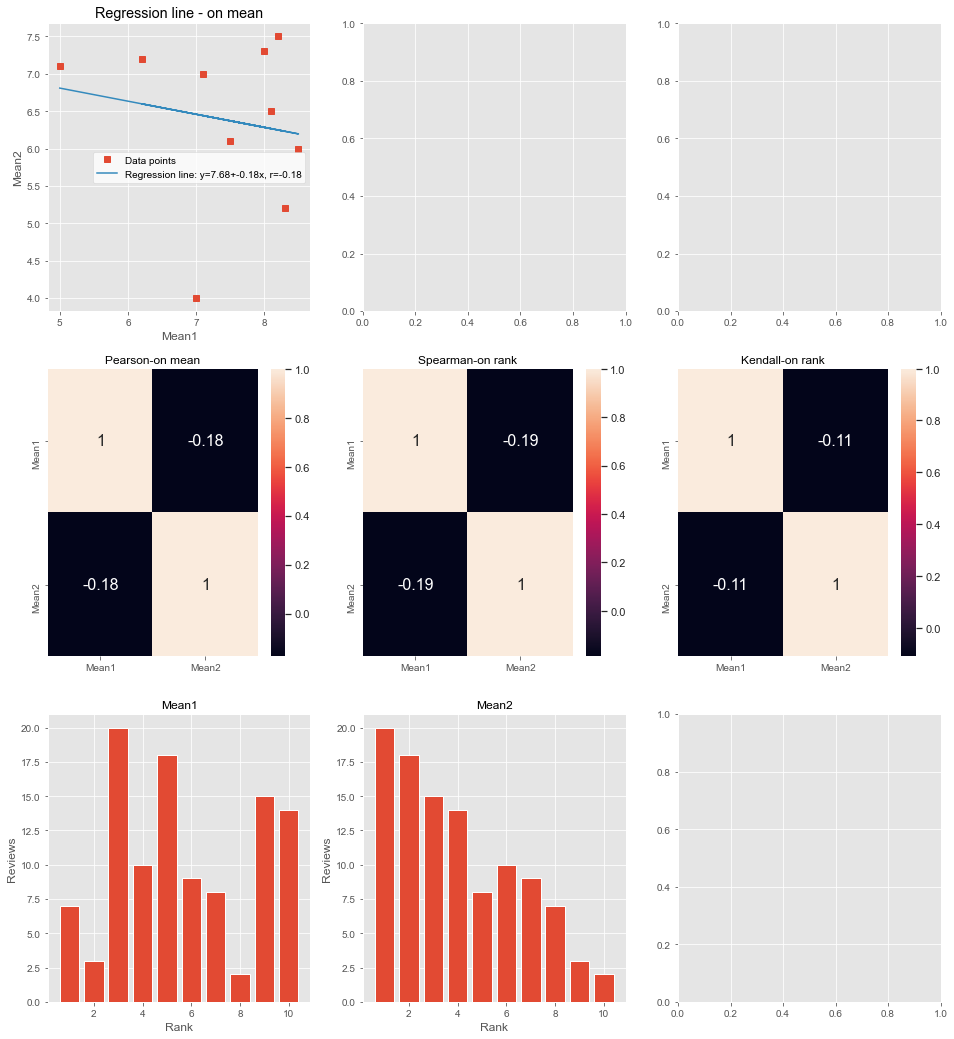

In [7]:
comparing1(df_testf)

# SPEARMAN'S RHO

##### Here are some important facts about the Spearman correlation coefficient:

##### It can take a real value in the range −1 ≤ ρ ≤ 1.
##### Its maximum value ρ = 1 corresponds to the case when there’s a monotonically increasing function between x and y. In other words, larger x values correspond to larger y values and vice versa.
##### Its minimum value ρ = −1 corresponds to the case when there’s a monotonically decreasing function between x and y. In other words, larger x values correspond to smaller y values and vice versa.

# KENDAL

##### Some important facts about the Kendall correlation coefficient are as follows:

##### It can take a real value in the range −1 ≤ τ ≤ 1.

##### Its maximum value τ = 1 corresponds to the case when the ranks of the corresponding values in x and y are the same. In other words, all pairs are concordant.

##### Its minimum value τ = −1 corresponds to the case when the rankings in x are the reverse of the rankings in y. In other words, all pairs are discordant.